In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df=pd.read_csv('fraudtrain.csv')
test_df=pd.read_csv('fraudtest.csv')
print(train_df.shape)
display(train_df.head())
print(test_df.shape)
display(test_df.head())

(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


(555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
train_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
train_df.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


In [6]:
train_df['last'].nunique(),train_df['first'].nunique()

(481, 352)

In [7]:
cat_df=train_df.select_dtypes(include='object')
cat_df.head()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46


In [8]:
train_df=train_df.select_dtypes(exclude="object")
train_df.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [9]:
cat_df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [10]:
train_df.drop(['cc_num'],inplace=True,axis=1)
train_df.head()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [11]:
#preprocessing standard scaler
s=StandardScaler()
for i in train_df.columns[1:9]:
    j=""
    j+=i
    train_df[j]=s.fit_transform(train_df[[j]])

In [12]:
train_df.head()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,-0.407826,-0.749136,-0.484420,0.657620,-0.282589,-1.858664,-0.494354,0.593864,0
1,1,0.230039,1.872567,2.039120,-2.033870,-0.293670,-1.858662,2.078699,-2.030341,0
2,2,0.934149,1.281042,0.717754,-1.601537,-0.280406,-1.858662,0.902849,-1.592323,0
3,3,-0.158132,0.402753,1.515617,-1.590766,-0.287742,-1.858660,1.662886,-1.621848,0
4,4,-0.177094,-0.906090,-0.023035,0.782279,-0.293835,-1.858651,0.026941,0.841909,0


In [13]:
x=train_df.iloc[:,1:9]
y=train_df['is_fraud']

In [14]:
#model selection
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1037340, 8), (259335, 8), (1037340,), (259335,))

In [15]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
lr.score(x_test,y_test)

0.9935835887944164

In [17]:
cr=classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    259172
           1       0.00      0.00      0.00       163

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       1.00      0.99      1.00    259335



In [18]:
cm=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

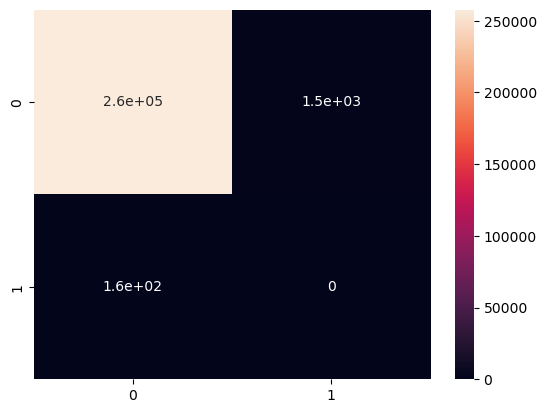

In [19]:
sns.heatmap(cm,annot=True)

In [20]:
l=[train_df['is_fraud'].value_counts()[0],train_df['is_fraud'].value_counts()[1]]
l

[1289169, 7506]

Text(0.5, 0, 'is_fraud')

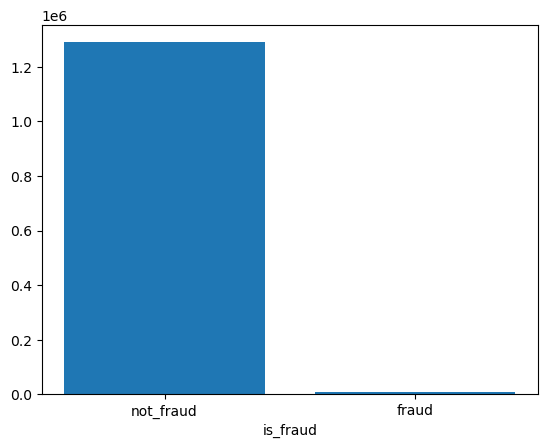

In [21]:
plt.bar(['not_fraud','fraud'],l)
plt.xlabel("is_fraud")

In [22]:
undersampling=NearMiss(version=1,n_neighbors=3)
x_train,y_train=undersampling.fit_resample(x_train,y_train)

In [23]:
from collections import Counter
Counter(y_train)

Counter({0: 6005, 1: 6005})

In [24]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [25]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
lr.score(x_test,y_test)

0.6619546146875662

<AxesSubplot:>

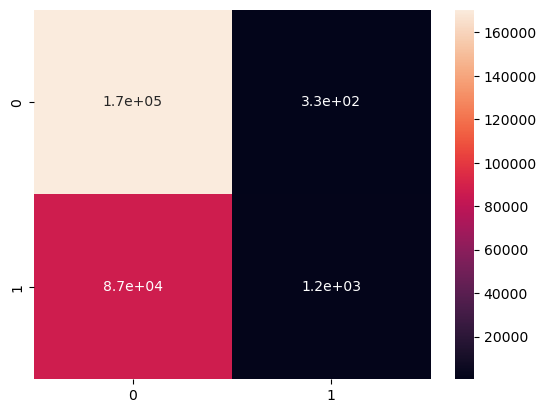

In [27]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [28]:
#Random forest  classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [29]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
rf.score(x_test,y_test)

0.3617868779763626

In [31]:
rf.feature_importances_

array([0.62830993, 0.04811916, 0.04302587, 0.04881567, 0.05172763,
       0.06665621, 0.05818007, 0.05516547])

<BarContainer object of 8 artists>

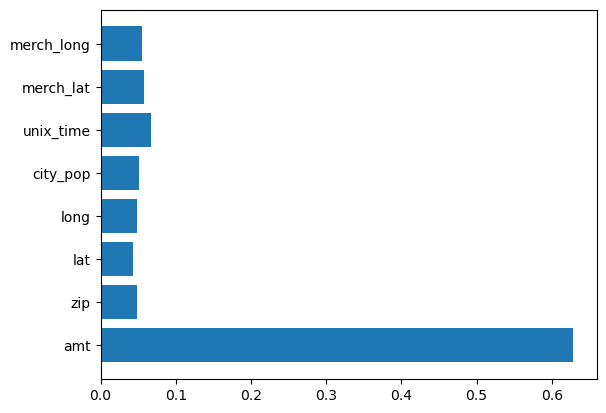

In [32]:
plt.barh(rf.feature_names_in_,rf.feature_importances_)

In [33]:
#DecisionTree
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

In [34]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [35]:
dc.score(x_test,y_test)

0.5773690400447298

In [36]:
#LabelEncoder
le=LabelEncoder()
for i in cat_df.columns:
    j=""
    j+=i
    cat_df[j]=le.fit_transform(cat_df[j])

In [37]:
cat_df.head()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,0,514,8,162,18,0,568,526,27,370,779,56438
1,1,241,4,309,157,0,435,612,47,428,607,159395
2,2,390,0,115,381,1,602,468,13,307,302,818703
3,3,360,2,163,463,1,930,84,26,328,397,544575
4,4,297,9,336,149,1,418,216,45,116,734,831111


In [38]:
train_df=pd.concat([train_df,cat_df],axis=1)
train_df.head()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,category,first,last,gender,street,city,state,job,dob,trans_num
0,0,-0.407826,-0.749136,-0.484420,0.657620,-0.282589,-1.858664,-0.494354,0.593864,0,...,8,162,18,0,568,526,27,370,779,56438
1,1,0.230039,1.872567,2.039120,-2.033870,-0.293670,-1.858662,2.078699,-2.030341,0,...,4,309,157,0,435,612,47,428,607,159395
2,2,0.934149,1.281042,0.717754,-1.601537,-0.280406,-1.858662,0.902849,-1.592323,0,...,0,115,381,1,602,468,13,307,302,818703
3,3,-0.158132,0.402753,1.515617,-1.590766,-0.287742,-1.858660,1.662886,-1.621848,0,...,2,163,463,1,930,84,26,328,397,544575
4,4,-0.177094,-0.906090,-0.023035,0.782279,-0.293835,-1.858651,0.026941,0.841909,0,...,9,336,149,1,418,216,45,116,734,831111


In [39]:
train_df.isna().sum()

Unnamed: 0               0
amt                      0
zip                      0
lat                      0
long                     0
city_pop                 0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date_trans_time    0
merchant                 0
category                 0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
job                      0
dob                      0
trans_num                0
dtype: int64

In [40]:
y=train_df['is_fraud']
train_df.drop(['is_fraud'],axis=1,inplace=True)
x=train_df
x.head()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_date_trans_time,...,category,first,last,gender,street,city,state,job,dob,trans_num
0,0,-0.407826,-0.749136,-0.484420,0.657620,-0.282589,-1.858664,-0.494354,0.593864,0,...,8,162,18,0,568,526,27,370,779,56438
1,1,0.230039,1.872567,2.039120,-2.033870,-0.293670,-1.858662,2.078699,-2.030341,1,...,4,309,157,0,435,612,47,428,607,159395
2,2,0.934149,1.281042,0.717754,-1.601537,-0.280406,-1.858662,0.902849,-1.592323,2,...,0,115,381,1,602,468,13,307,302,818703
3,3,-0.158132,0.402753,1.515617,-1.590766,-0.287742,-1.858660,1.662886,-1.621848,3,...,2,163,463,1,930,84,26,328,397,544575
4,4,-0.177094,-0.906090,-0.023035,0.782279,-0.293835,-1.858651,0.026941,0.841909,4,...,9,336,149,1,418,216,45,116,734,831111


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1037340, 21), (259335, 21), (1037340,), (259335,))

In [44]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

<BarContainer object of 21 artists>

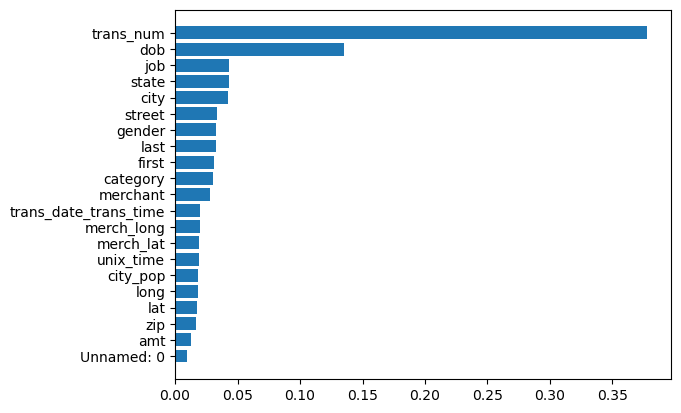

In [45]:
plt.barh(rf.feature_names_in_,sorted(rf.feature_importances_))

In [46]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
lr.score(x_test,y_test)

0.9942121194593865

In [49]:
x_train,y_train=undersampling.fit_resample(x_train,y_train)
Counter(y_train)

Counter({0: 6005, 1: 6005})

In [50]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [51]:
lr.score(x_test,y_test)

0.40210538492683207

In [52]:
rf.score(x_test,y_test)

0.9977326623864885

In [53]:
sorted(rf.feature_importances_)[-5:],sorted(rf.feature_names_in_[:11])

([0.042242240772687775,
  0.04278196781482944,
  0.04340604254957832,
  0.1349535849180282,
  0.3780723224932354],
 ['Unnamed: 0',
  'amt',
  'city_pop',
  'lat',
  'long',
  'merch_lat',
  'merch_long',
  'merchant',
  'trans_date_trans_time',
  'unix_time',
  'zip'])

<BarContainer object of 21 artists>

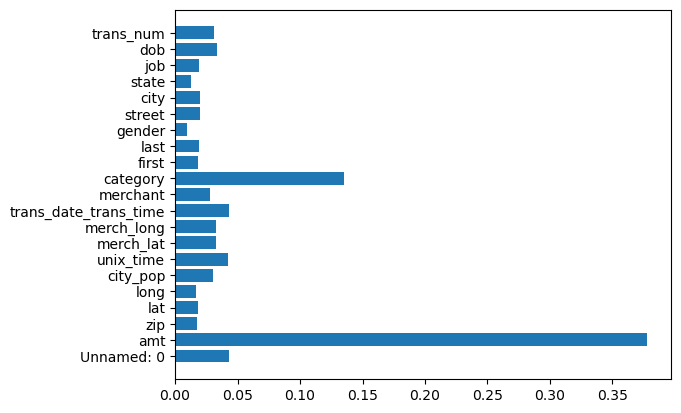

In [54]:
plt.barh(rf.feature_names_in_,rf.feature_importances_)

In [55]:
sorted(rf.feature_importances_[-5:])

[0.013032484730556683,
 0.019326043533423397,
 0.019604887716535725,
 0.031026070195593402,
 0.033611702371684905]

In [56]:
x=train_df.loc[:,['trans_num','category','amt','trans_date_trans_time','unix_time']]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [58]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
rf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
import joblib

In [61]:
joblib.dump(rf,'credit-card-fraud.joblib')

['credit-card-fraud.joblib']

In [62]:
model=joblib.load("credit-card-fraud.joblib")